# challenge 1

In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 
plt.style.use('seaborn')

In [23]:
pimas_norm = pd.read_csv("pima_norm_2.csv", sep=",")

In [24]:
pimas_norm.head()

,Unnamed: 0,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,0,6,148,72.0,0.0,33.6,0.627,50,1.3790,True
1,1,1,85,66.0,0.0,26.6,0.351,31,1.1426,False
2,2,8,183,NaN,0.0,23.3,0.672,32,0.0000,True
3,3,1,89,66.0,94.0,28.1,0.167,21,0.9062,False
4,4,0,137,40.0,168.0,43.1,2.288,33,1.3790,True


(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

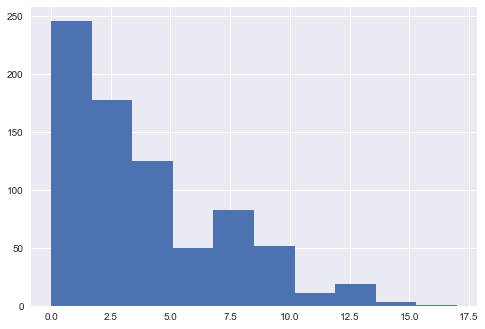

In [26]:
plt.hist(pimas_norm["num_preg"])

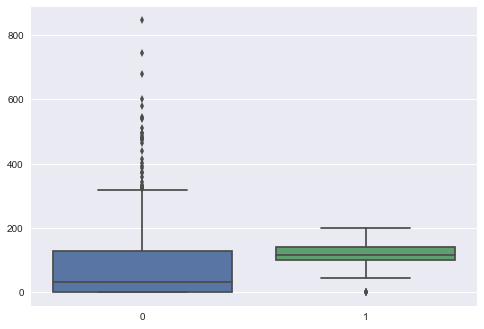

In [34]:
sns.boxplot(data=[pimas_norm['insulin'], pimas_norm['glucose_conc']])

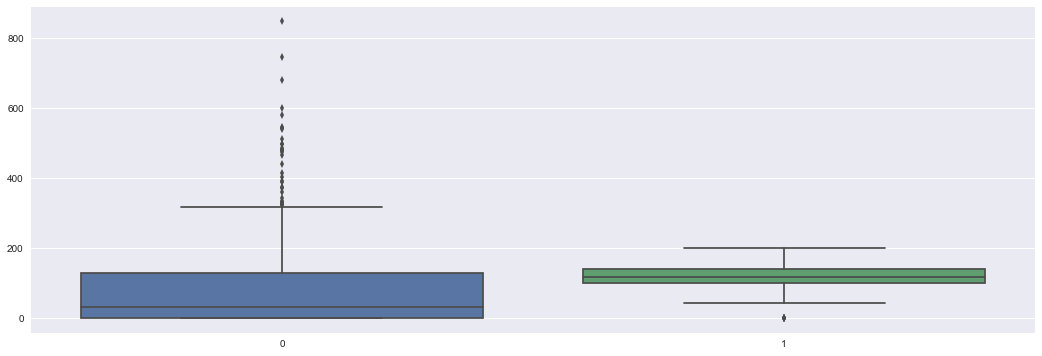

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(18,6)
sns.boxplot(ax = ax, data=[pimas_norm['insulin'], pimas_norm['glucose_conc']])

# Challenge 2

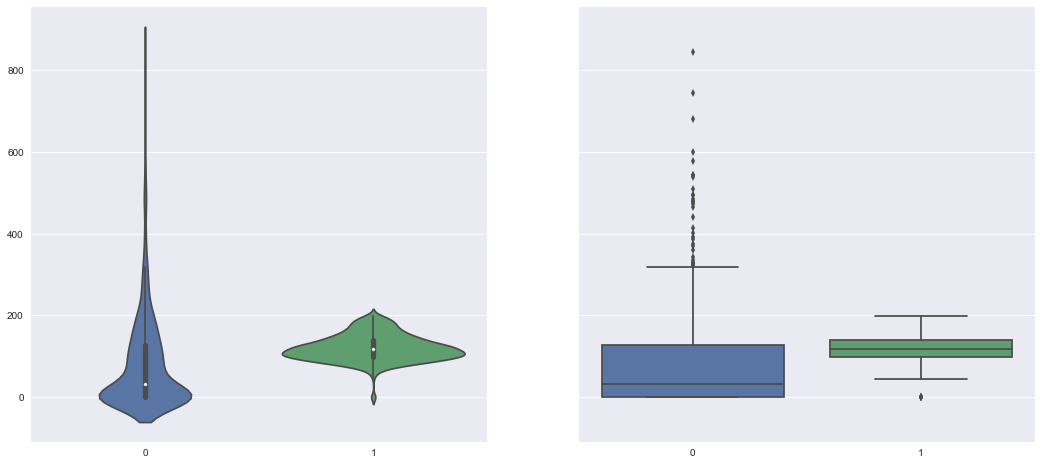

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True) 
fig.set_size_inches(18, 8)
sns.violinplot(ax=ax1, data=[pimas_norm['insulin'], pimas_norm['glucose_conc']]) 
sns.boxplot(ax=ax2, data=[pimas_norm['insulin'], pimas_norm['glucose_conc']])

Conforme boxplot, temos outliers na 'insulin' e 'gluvose_conc'

# Challenge 3

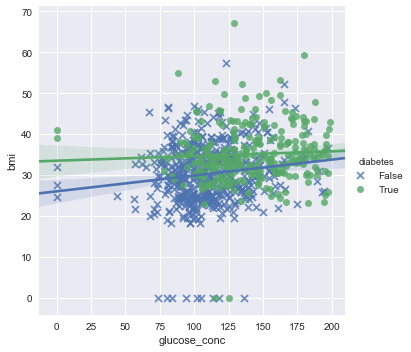

In [54]:
sns.lmplot("glucose_conc", "bmi", pimas_norm,hue="diabetes", markers=["x", "o"])

# Challenge 4

In [106]:
bolsa = pd.read_excel('data_akbilgic.xlsx')

In [107]:
bolsa.head()

,date,year,month,day,month_year,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,2009,1,5,1/2009,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,2009,1,6,1/2009,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,2009,1,7,1/2009,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,2009,1,8,1/2009,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,2009,1,9,1/2009,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [108]:
bolsa = bolsa.drop(['date','month', 'year'], axis=1)

In [70]:
bolsa = bolsa.groupby(['year','month']).sum()

In [109]:
bolsa['month_year'] =  pd.to_datetime(bolsa['month_year'], format='%m/%Y')

In [110]:
bolsa.head()

,day,month_year,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5,2009-01-01,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6,2009-01-01,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7,2009-01-01,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8,2009-01-01,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9,2009-01-01,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [112]:
bolsa_pivoted = bolsa.pivot("month_year", "day", "BOVESPA")
bolsa_pivoted.head()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month_year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,0.031190,0.018920,-0.035899,0.028283,-0.009764,NaN,...,-0.016982,0.006261,NaN,NaN,0.009838,0.004922,0.038725,-0.014750,-0.008538,NaN
2009-02-01,NaN,-0.016289,0.027574,0.009565,0.024128,0.039282,NaN,NaN,-0.015462,-0.021440,...,NaN,-0.012554,0.000000,0.000000,-0.001361,0.000079,NaN,NaN,NaN,NaN
2009-03-01,NaN,-0.052365,0.006410,0.051674,-0.027268,-0.007090,NaN,NaN,-0.009858,0.054398,...,NaN,0.057290,-0.022953,0.007757,0.018724,-0.016143,NaN,NaN,-0.030380,0.006693
2009-04-01,0.025332,0.041074,0.014865,NaN,NaN,-0.005059,-0.007773,0.008113,0.030252,0.009898,...,0.000000,NaN,0.041114,NaN,NaN,-0.020564,0.000022,0.030223,0.001333,NaN
2009-05-01,NaN,NaN,NaN,0.063792,0.005244,0.016228,-0.028380,0.026378,NaN,NaN,...,0.009557,NaN,NaN,0.004892,0.019970,-0.000946,0.023830,0.002956,NaN,NaN


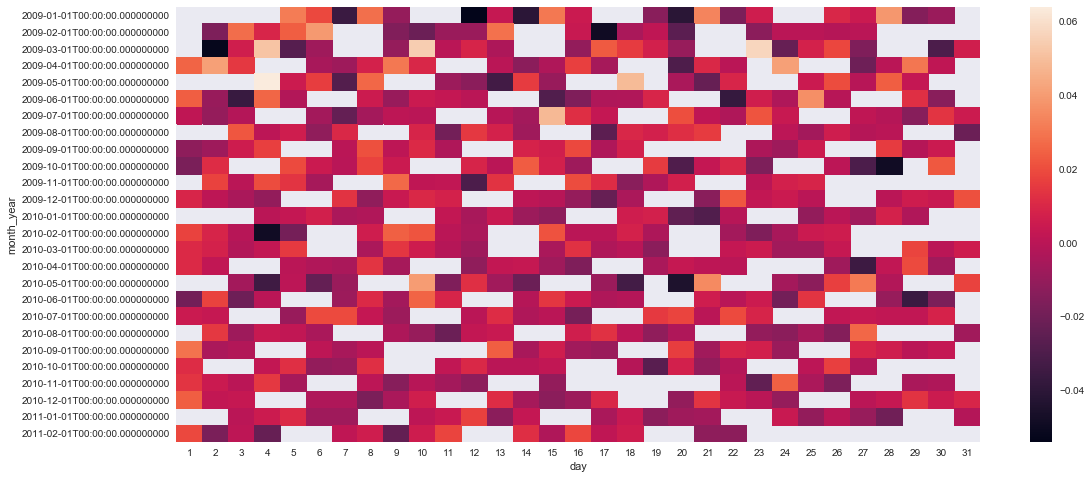

In [113]:
fig, ax = plt.subplots() 
fig.set_size_inches(18, 8)
sns.heatmap(bolsa_pivoted)